
---

# 🧠 Convolutional Neural Network (CNN)

*Also known as: A computer’s eyes 👁️*

---

## 👶 Baby-Level Analogy

Imagine you give a drawing of a cat 🐱 to a robot.

A **normal neural network (ANN)** looks at **every pixel at once** and says: "Okay, here are 10,000 numbers… let’s try to figure it out."

A **CNN**, instead, says:

> “Wait! I’ll **look at small parts of the image**, like a window. I'll first check the eyes 👀, then the ears 👂, then the whiskers 🐾, and so on.”

It **slides** over the image, picks up features, and then builds up its understanding of **what’s in the picture**.

---

## 🔍 Why Not Use ANN for Images?

| Problem                          | ANN Limitation                                    |
| -------------------------------- | ------------------------------------------------- |
| Images are huge (e.g. 128x128x3) | Too many inputs and parameters                    |
| Patterns exist locally           | ANN doesn’t understand spatial relationships      |
| Translational variations         | ANN doesn’t recognize same object in new position |

So we use **CNN** instead. It is specially made for **spatial data** like **images**, **videos**, and **grids**.

---

## 🧱 CNN Architecture (Lego Block by Block)

```
INPUT IMAGE 🖼️
   ⬇️
[ CONVOLUTION LAYER 🔍 ]
   ⬇️
[ ACTIVATION FUNCTION 🔥 ]
   ⬇️
[ POOLING LAYER 💧 ]
   ⬇️
[ (Repeat Conv + Pool) ]
   ⬇️
[ FLATTEN 🧻 ]
   ⬇️
[ DENSE LAYERS 🧠 ]
   ⬇️
[ OUTPUT LAYER 🎯 ]
```

Let’s now define every block… atomically.

---

## 🧊 1. Input Layer

* Takes the image as a 3D matrix: e.g. `28 x 28 x 1` for grayscale, or `128 x 128 x 3` for RGB.

---

## 🔍 2. Convolution Layer (the star ⭐)

* Slides a **filter/kernel** over the image
* Each filter detects **patterns** like:

  * Edges ✂️
  * Corners ◼️
  * Textures 🧵

🔁 It performs this formula at every window:

```
Output = (Window ⊙ Filter) + Bias
```

> 👁️ Think of it like scanning the image with glasses that highlight edges, curves, etc.

---

## 🔥 3. Activation Function (like ReLU)

* Adds **non-linearity**
* Common function: `ReLU(x) = max(0, x)`
* Helps the network learn complex patterns

---

## 💧 4. Pooling Layer (Downsampling)

* Reduces size to make learning faster
* Keeps important features, throws away the rest
* Most common: **MaxPooling** — picks the biggest number in a region

| Original | After MaxPool |
| -------- | ------------- |
| 1 3      | 3             |
| 2 0      |               |

---

## 🧻 5. Flatten

* Converts 3D feature map to 1D vector
* Needed before connecting to a fully connected (dense) layer

---

## 🧠 6. Fully Connected (Dense) Layers

* Standard ANN layers
* Final decision-making happens here

---

## 🎯 7. Output Layer

* Depends on the task:

  * **Softmax** for classification (e.g. cat, dog, frog)
  * **Sigmoid** for binary classification
  * **Linear** for regression tasks

---

## 🧪 Real-Life Analogy: Face Recognition

1. Convolution: Find your **eyes, nose, mouth**
2. Pooling: Focus on the **strongest features**
3. Flatten: Turn into a **feature vector**
4. Dense: Decide: “Yes, this is Nabeel!”

---

## 💡 TL;DR Summary

| Layer             | What It Does                   | Analogy             |
| ----------------- | ------------------------------ | ------------------- |
| Convolution       | Detects features               | Magnifying glass 🔍 |
| Activation (ReLU) | Adds non-linearity             | ON/OFF switch 🔥    |
| Pooling           | Reduces size & complexity      | Shrinking 💧        |
| Flatten           | Converts to 1D for dense input | Rolling paper 🧻    |
| Dense             | Learns final decision          | Brain 🧠            |
| Output            | Gives the prediction           | Final answer 🎯     |

---

## 📊 CNN in Code (Keras)

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # For 3-class classification
])
```

---

## 🧠 Final Thought

> CNNs are how computers **see** the world, piece by piece, layer by layer — just like us humans.

---



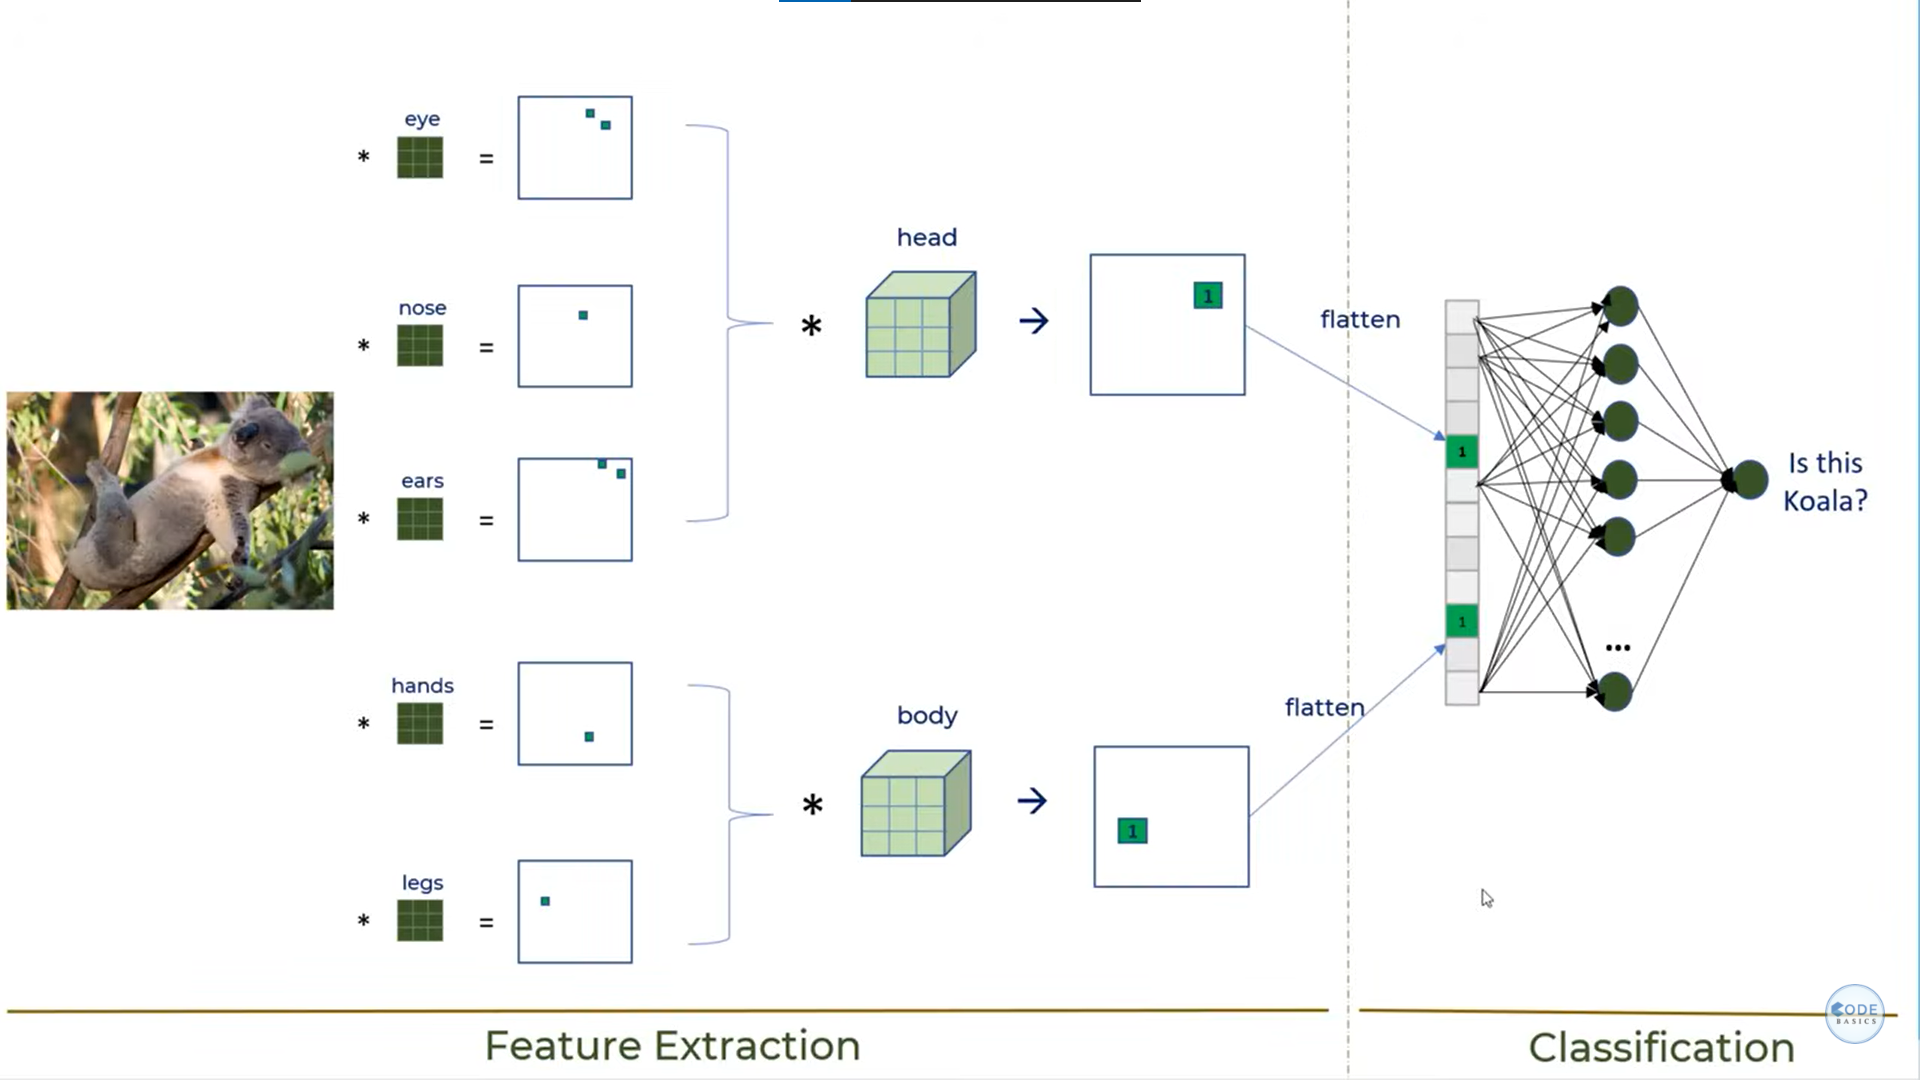
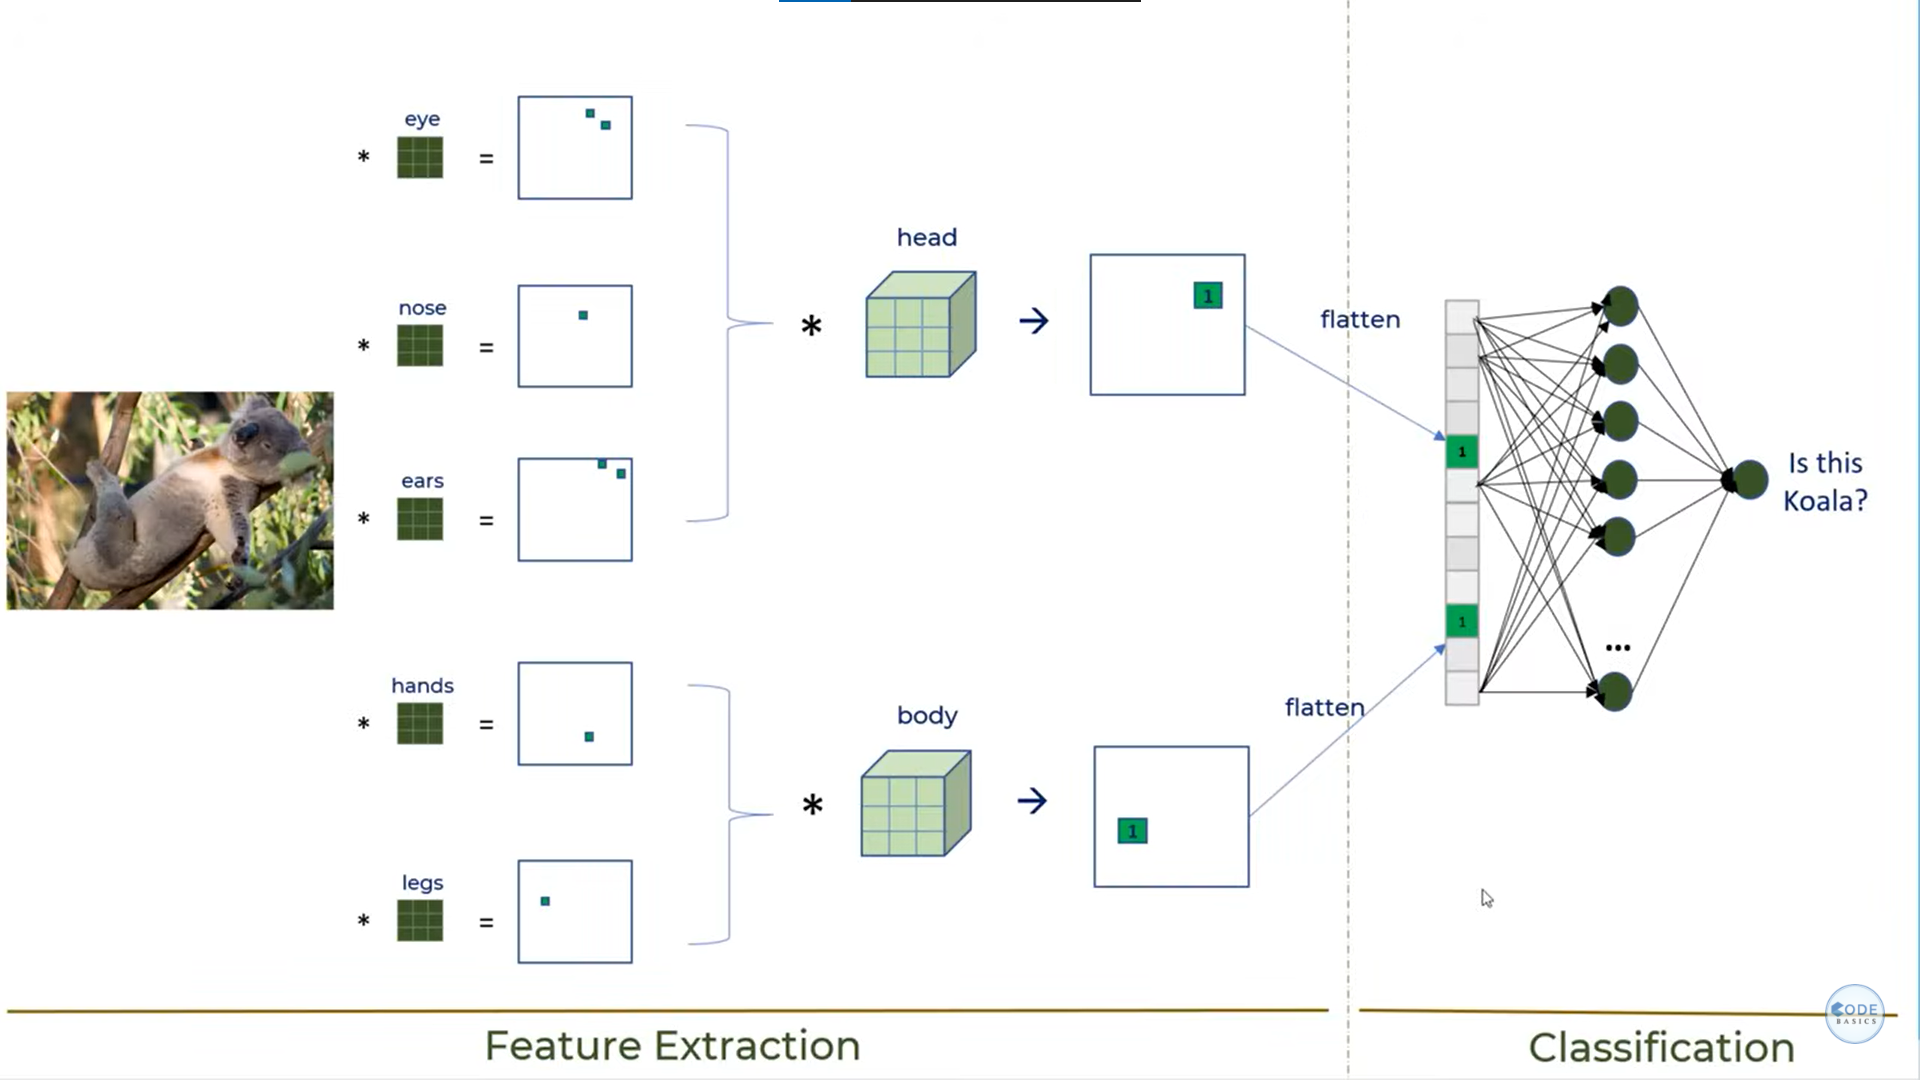
## Polling reduces the size of image
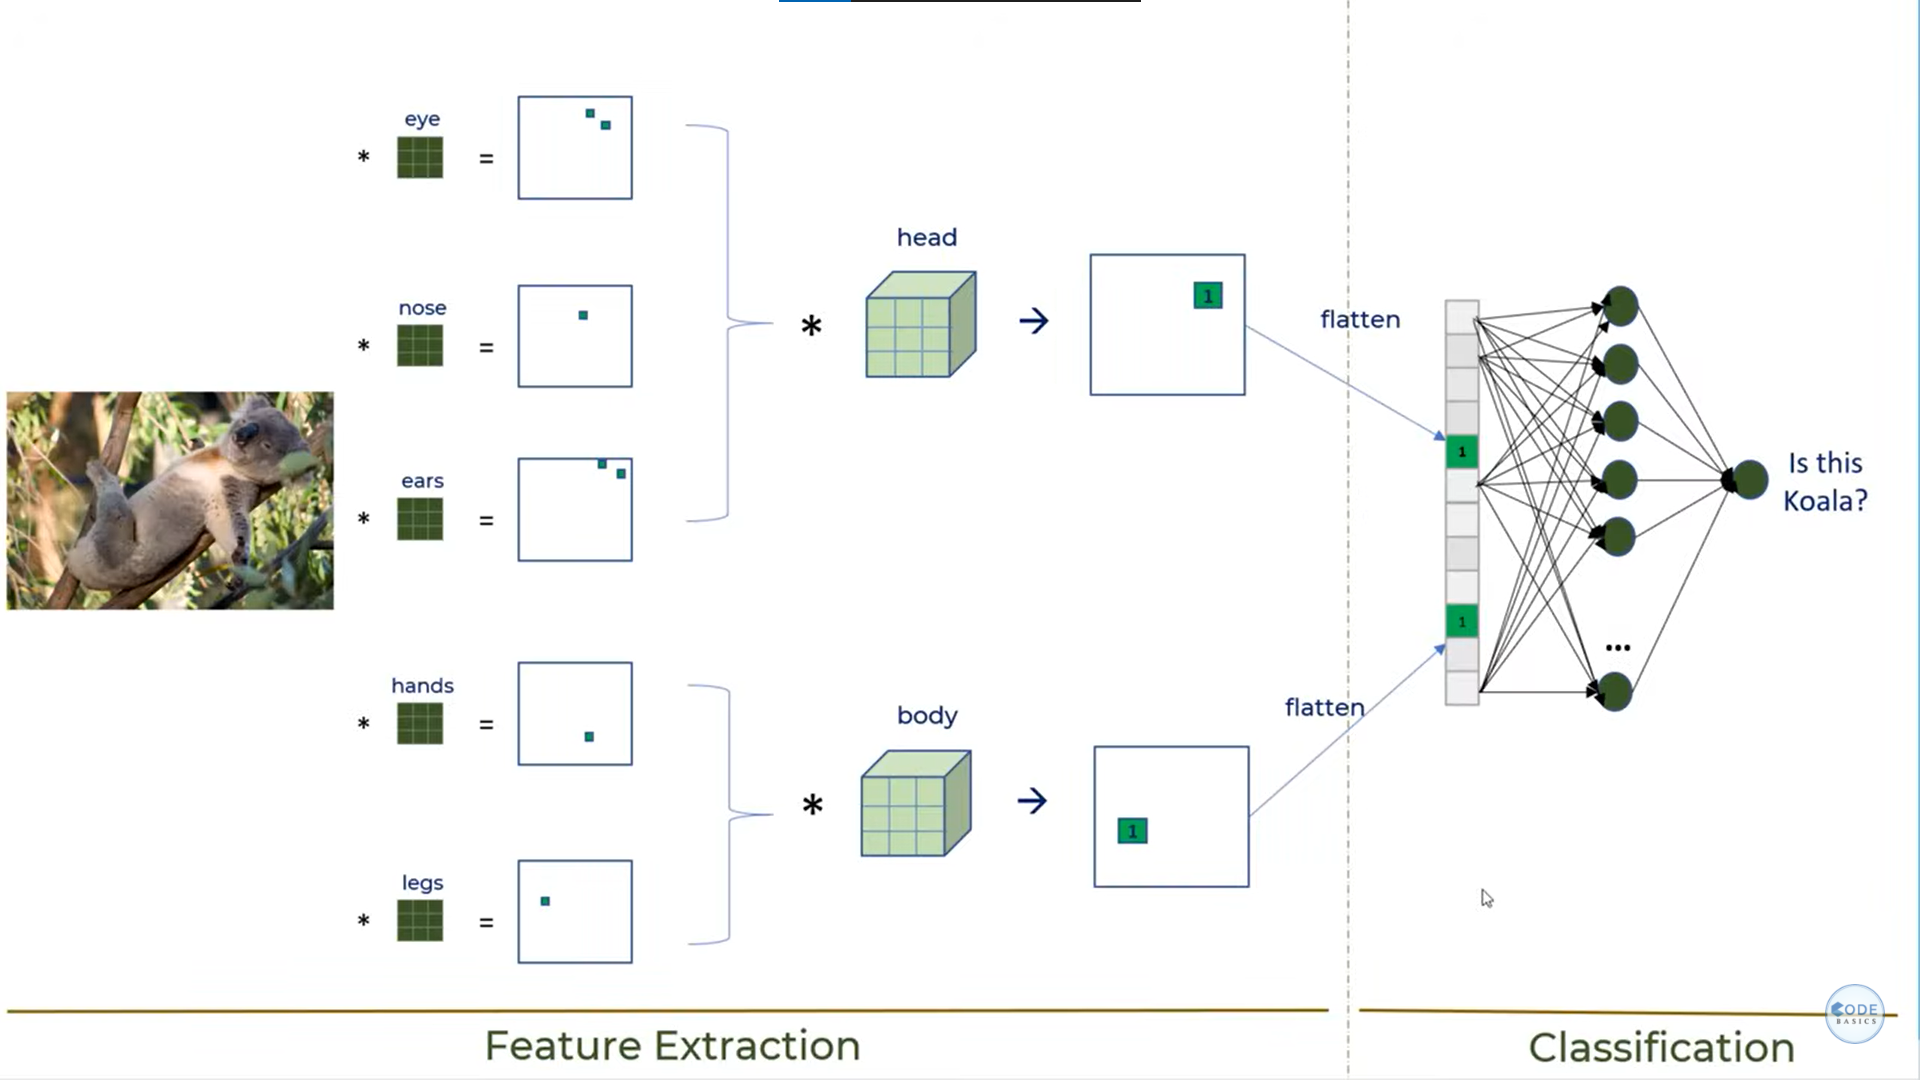
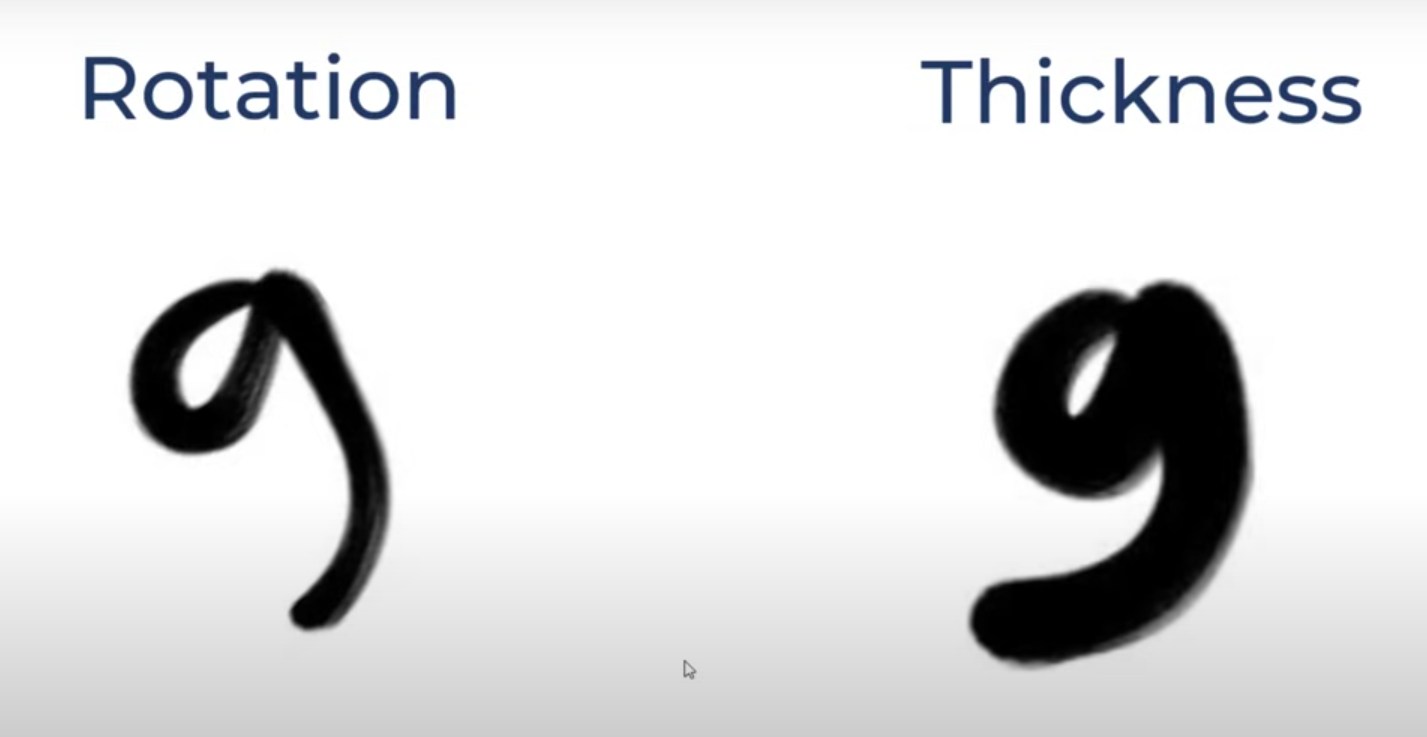
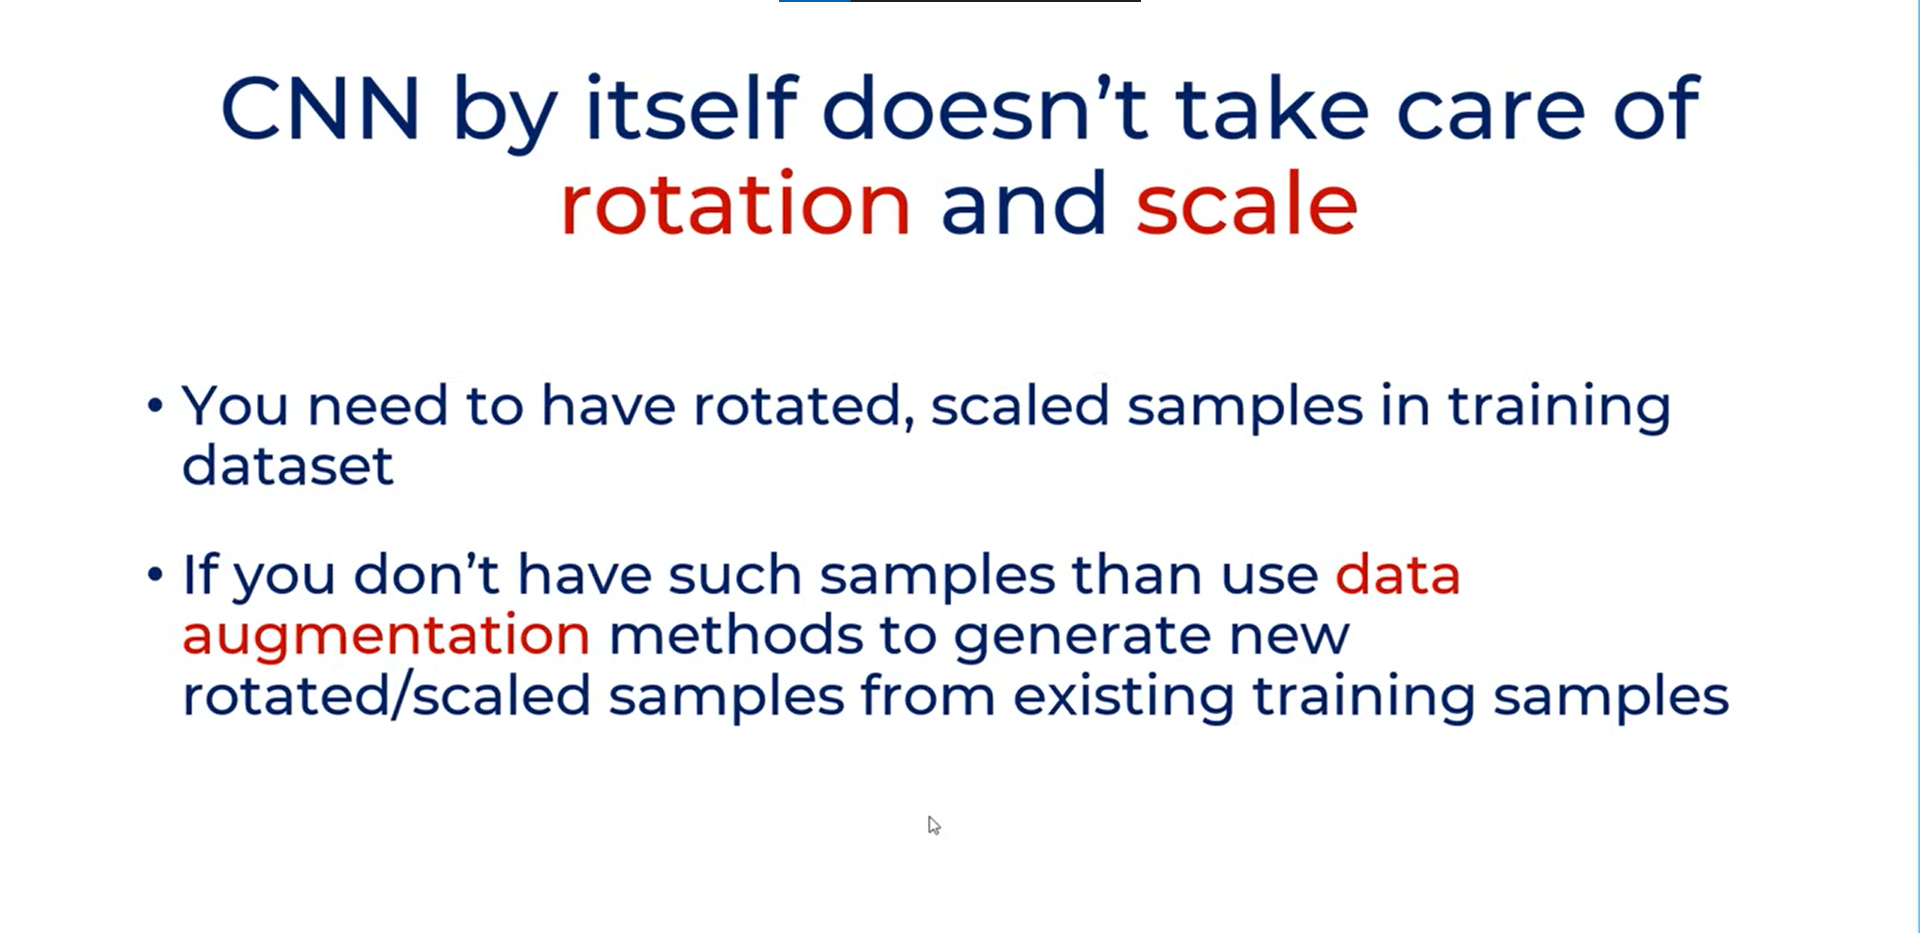

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train,y_train), (X_test,y_test)= keras.datasets.cifar10.load_data()
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
y_train.shape

(50000, 1)

In [4]:
# Lets convert y_train to one dim array
y_train = y_train.reshape(-1,) # Here when you dont want to change the first dim so you put -1 and blanck in the second to it will be flatten
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

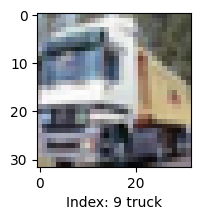

In [6]:
plot_sample(X_train,y_train,1)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
# Lets scale the data
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [10]:
ann = keras.Sequential([
    # Input Layer
    keras.layers.Flatten(input_shape=(32,32,3)),
    # Hidden Layers
    keras.layers.Dense(400,activation='relu'), # In hidden layers activation relu is preffered
    keras.layers.Dense(200,activation='relu'), # In hidden layers activation relu is preffered
    # Output layer
    keras.layers.Dense(10,activation='sigmoid'), # if you dont give any activation function its linear by default so it wont do any activation
])

ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy', # here we used categorical_crossentropy because when we use one hot encoding we use this but in out previous hand written digits classification we used sparse_categorical_crossentropy
    metrics=['accuracy']
)

ann.fit(X_train,y_train,epochs=5)


Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8728 - accuracy: 0.3301
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6822 - accuracy: 0.4046
Epoch 3/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6027 - accuracy: 0.4333
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5452 - accuracy: 0.4537
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4994 - accuracy: 0.4701


In [15]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5125 - accuracy: 0.4626


[1.5125484466552734, 0.4625999927520752]

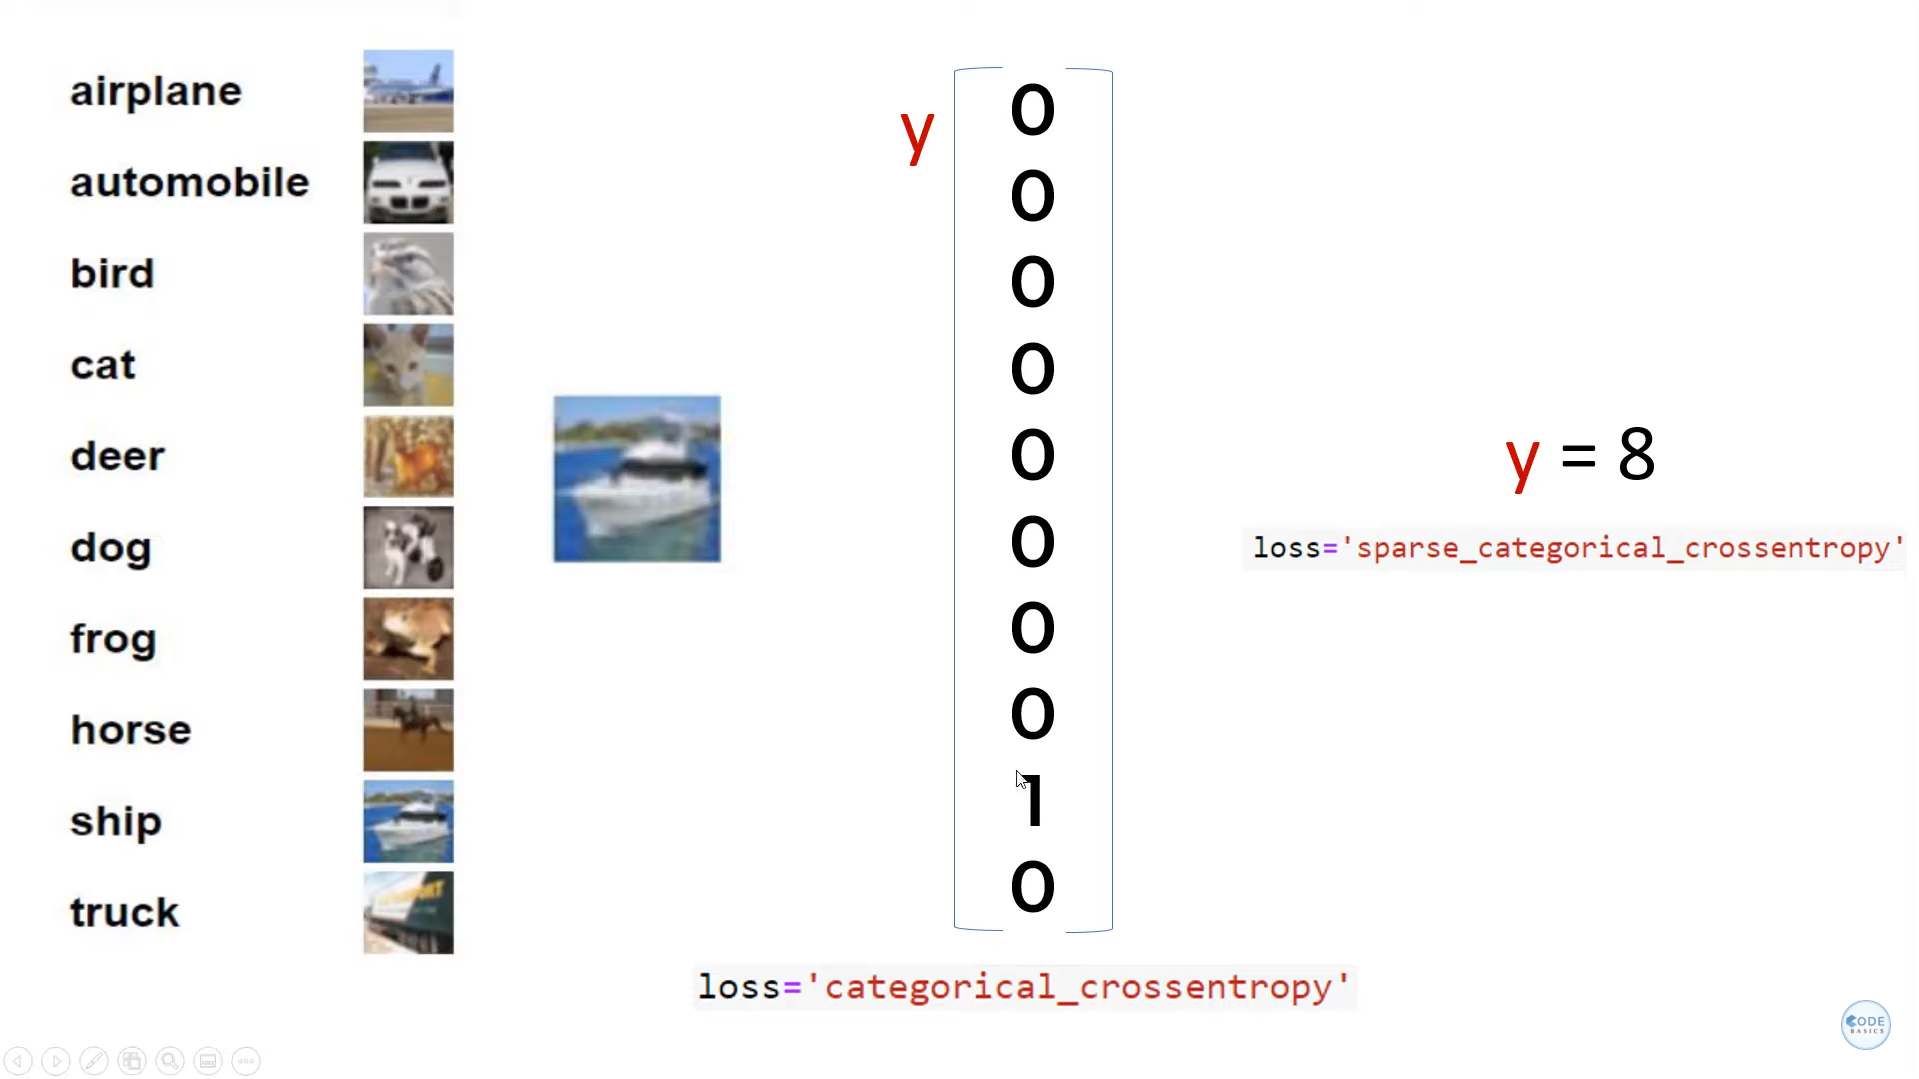

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 1s 4ms/step


In [21]:
print("Classification Report ")
print(classification_report(y_test,y_pred_classes))

Classification Report 
              precision    recall  f1-score   support

           0       0.71      0.33      0.45      1000
           1       0.63      0.55      0.59      1000
           2       0.39      0.25      0.31      1000
           3       0.34      0.23      0.28      1000
           4       0.39      0.42      0.40      1000
           5       0.39      0.38      0.39      1000
           6       0.37      0.74      0.50      1000
           7       0.59      0.46      0.51      1000
           8       0.48      0.71      0.58      1000
           9       0.54      0.55      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



## Here we will start our CNN code

for that we will use activation as (**softmax**) its a little diffrent from sigmoid this will give you a value between 0 to 1 including all the output entries and the sum of all will be one

> 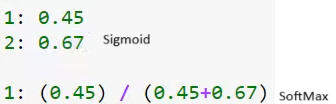  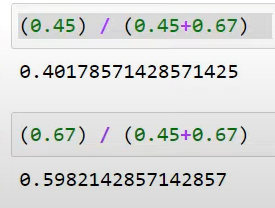 

for example in this image if you sum both the values then you will get one 


### The best part about CNN is that you dont need to tell it about the features it will automatically figure it out you just need to give the filter size and how many filters you want

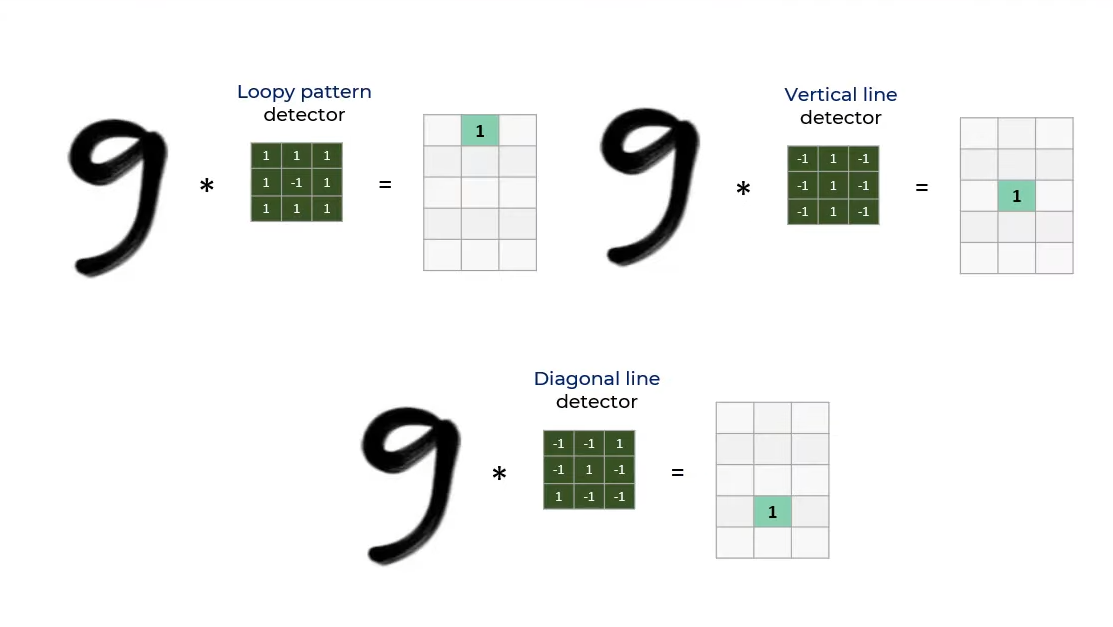

### Here filter means that it will extract 32 filters from the image (features/edges) and kernal size means the grid in which we search for features in the above image we also used the 3x3 grid

In [25]:
cnn = keras.Sequential([
    # CNN
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)), 
    keras.layers.MaxPooling2D((2,2)), # You can just have one cnn layer its fine but for fun i am adding one more 

    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)), 
    keras.layers.MaxPooling2D((2,2)),

    # Dense
    keras.layers.Flatten(),
    keras.layers.Dense(400,activation='relu'), # In hidden layers activation relu is preffered
    keras.layers.Dense(10,activation='sigmoid'), # if you dont give any activation function its linear by default so it wont do any activation
])


cnn.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy', # here we used categorical_crossentropy because when we use one hot encoding we use this but in out previous hand written digits classification we used sparse_categorical_crossentropy
    metrics=['accuracy']
)

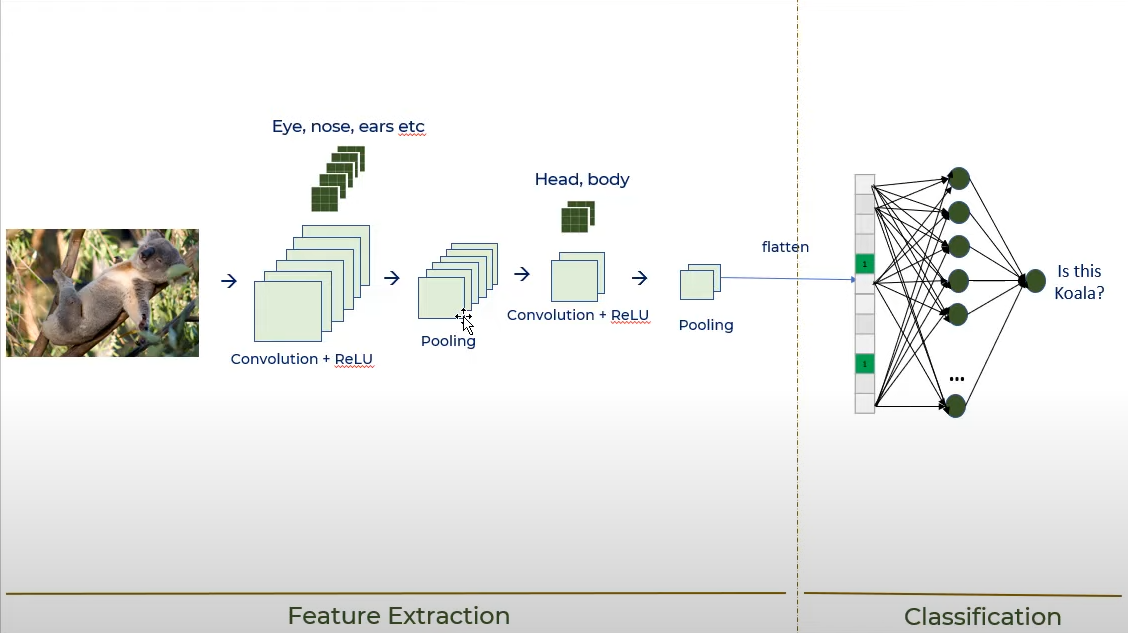

In [27]:
cnn.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8313 - accuracy: 0.7130
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7807 - accuracy: 0.7310
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7362 - accuracy: 0.7474
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6914 - accuracy: 0.7623
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6478 - accuracy: 0.7773
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6020 - accuracy: 0.7938
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5570 - accuracy: 0.8088
Epoch 8/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5146 - accuracy: 0.8238
Epoch 9/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4700 - accuracy: 0.8403
Epoch 10/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.42

In [29]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.5292 - accuracy: 0.6762


[1.5291996002197266, 0.6761999726295471]

In [30]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

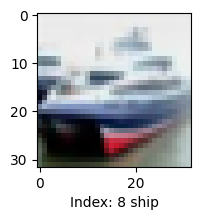

In [31]:
y_test = y_test.reshape(-1)
plot_sample(X_test,y_test,1)

In [32]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]


313/313 [==============================] - 1s 3ms/step


In [39]:
for i in range(10):
    # plot_sample(X_test,y_test,i)
    print("Prediction:",y_pred_classes[i] ,classes[y_pred_classes[i]], ";  Truth:", y_test[i],classes[y_test[i]])

Prediction: 3 cat ;  Truth: 3 cat
Prediction: 1 automobile ;  Truth: 8 ship
Prediction: 8 ship ;  Truth: 8 ship
Prediction: 0 airplane ;  Truth: 0 airplane
Prediction: 4 deer ;  Truth: 6 frog
Prediction: 6 frog ;  Truth: 6 frog
Prediction: 1 automobile ;  Truth: 1 automobile
Prediction: 2 bird ;  Truth: 6 frog
Prediction: 3 cat ;  Truth: 3 cat
Prediction: 1 automobile ;  Truth: 1 automobile


In [40]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.72      0.85      0.78      1000
           2       0.63      0.53      0.58      1000
           3       0.43      0.62      0.51      1000
           4       0.77      0.46      0.58      1000
           5       0.64      0.47      0.54      1000
           6       0.70      0.81      0.75      1000
           7       0.75      0.73      0.74      1000
           8       0.75      0.80      0.77      1000
           9       0.76      0.70      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



# Exercise

Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference:
https://github.com/nabeelalikhan0/Deep-Learning-Tuto/Tensorflow/1.3 Neural Network For Handwritten Digits Classification .ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN
and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on
your own, you can check my solution by clicking on this link: